Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1.Load heart disease dataset in pandas dataframe
2.Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
3.Convert text columns to numbers using label encoding and one hot encoding
4.Apply scaling
5.Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life
6.Solution Link https://github.com/codebasics/py/blob/master/ML/18_PCA/Exercise/PCA_heart_disease_prediction_exercise_solution.ipynb

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [13]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [14]:
#Identifying columns having strings/object type and storing col names
str_col = []
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'float64':
           str_col.append(i)
str_col

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

In [15]:
#Using get dummies for one hot encoding
df_2 = pd.concat([df,pd.get_dummies(df[str_col]).astype(int)], axis=1)

#Dropping string/object columns after converting to one hot encdoing
df_2 = df_2.drop(df[str_col],axis=1)

#Checking change in dimentions after one hot encoding
df_2.shape, df.shape

((918, 20), (918, 12))

In [16]:
df_2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


<Axes: >

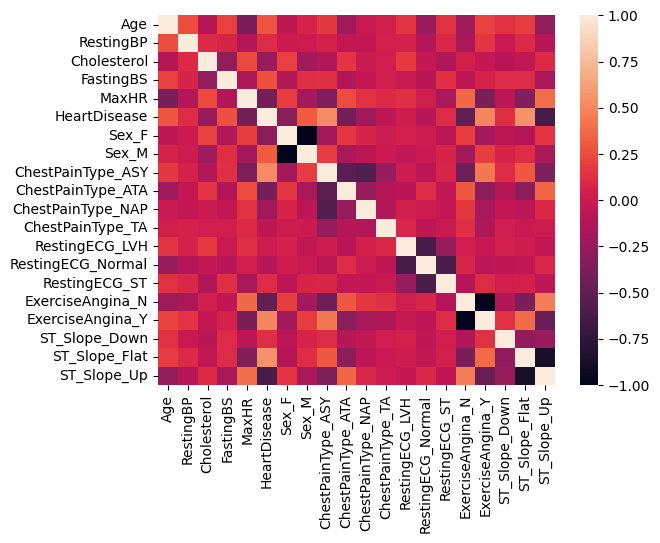

In [17]:
import seaborn as sns

sns.heatmap(df_2.corr())

In [18]:
import numpy as np
from scipy import stats


# Calculate Z-scores for the entire dataset
z_scores = np.abs(stats.zscore(df_2))

# Set a threshold for identifying outliers (commonly set at 3)
threshold = 3

# Identify outliers using the Z-score
outliers = np.where(z_scores > threshold)[0]

# Print the indices of the outliers
print("Indices of outliers:", outliers)

# Remove outliers from the dataset
data_no_outliers = df_2[(z_scores <= threshold)]
data_no_outliers = df_2[(data_no_outliers >= -threshold)]

# Print the new dataset without outliers
print("Dataset without outliers:", data_no_outliers)

Indices of outliers: [ 20  76  88 109 118 119 149 165 195 199 200 215 237 241 245 247 294 303
 307 309 314 323 325 329 335 339 340 341 352 355 365 374 390 396 399 418
 432 434 449 450 462 464 477 481 482 483 488 492 496 497 500 504 508 513
 518 521 534 537 541 543 547 547 549 553 556 559 568 570 578 592 592 598
 603 611 616 628 632 633 634 648 652 678 679 679 700 702 702 732 732 733
 733 734 739 748 750 758 759 771 773 775 782 784 785 789 795 806 813 820
 824 825 843 844 850 858 879 889 890 900 904 907 913]
Dataset without outliers:      Age  RestingBP  Cholesterol  FastingBS  MaxHR  HeartDisease  Sex_F  \
0     40      140.0        289.0          0  172.0             0      0   
1     49      160.0        180.0          0  156.0             1      1   
2     37      130.0        283.0          0   98.0             0      0   
3     48      138.0        214.0          0  108.0             1      1   
4     54      150.0        195.0          0  122.0             0      0   
..   ...   

In [19]:
X = df_2.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X, y

(     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Sex_F  Sex_M  \
 0     40        140          289          0    172      0      1   
 1     49        160          180          0    156      1      0   
 2     37        130          283          0     98      0      1   
 3     48        138          214          0    108      1      0   
 4     54        150          195          0    122      0      1   
 ..   ...        ...          ...        ...    ...    ...    ...   
 913   45        110          264          0    132      0      1   
 914   68        144          193          1    141      0      1   
 915   57        130          131          0    115      0      1   
 916   57        130          236          0    174      1      0   
 917   38        138          175          0    173      0      1   
 
      ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
 0                    0                  1                  0   
 1                    0                 

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_2 = scaler.fit_transform(df_2)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Implementing Random Forest without using PCA

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9130434782608695
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        77
           1       0.92      0.93      0.93       107

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184



In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Create a PCA instance
pca = PCA(0.95)

# Fit the data and transform it to the principal components
X_pca = pca.fit_transform(df_2)

X.shape, X_pca.shape

((918, 19), (918, 2))

In [29]:
pca.explained_variance_ratio_

array([0.92026564, 0.04913433])

In [32]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.6902173913043478
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65        77
           1       0.76      0.68      0.72       107

    accuracy                           0.69       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.70      0.69      0.69       184

